# Note

Once you get a grasp on how to do the calculation you can skip steps. I will go through each step but once you get the hang of it just skip ahead. Make a Copy of this google colab notebook

Secondly, Make sure RunTime Type is TPU not CPU.

# Make a Copy of This Google Colab

# Learning Objectives:

1. Forward Propagation
2. Activation Functions
3. Neural Network Mathematics
4. Layers, Nodes, Weighted Sums

### Download Dependencies

In [ ]:
%%capture
%pip install numpy scipy pandas scikit-learn matplotlib torch

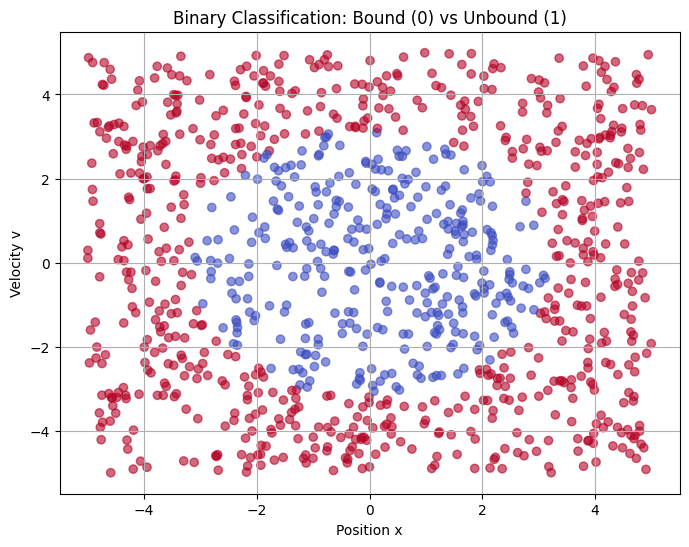

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gdown
import numpy as np
from sklearn.model_selection import train_test_split

# Parameters
k = 1.0  # spring constant
E_thresh = 5.0  # energy threshold
n_samples = 1000
mass = 1.0

# Generate random (x, v) values
position = np.random.uniform(-5, 5, n_samples)
velocity = np.random.uniform(-5, 5, n_samples)

# Compute energies
potential_energy = 0.5 * k * position**2
kinetic_energy = 0.5 *mass* velocity**2
total_energy = kinetic_energy + potential_energy

# Generate labels: 0 if bounded (E <= E_threshold), 1 if unbounded (E > E_threshold)
labels = (total_energy > E_thresh).astype(int)

# Create a DataFrame
df = pd.DataFrame({
    'Position': position,
    'Velocity': velocity,
    'Kinetic Energy': kinetic_energy,
    'Potential Energy': potential_energy,
    'Mechanical Energy': total_energy,
    'Label': labels
})

# Plotting the data
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df['Position'], df['Velocity'], c=df['Label'], cmap='coolwarm', alpha=0.6)
plt.xlabel('Position x')
plt.ylabel('Velocity v')
plt.title('Binary Classification: Bound (0) vs Unbound (1)')
plt.grid(True)
plt.show()

# Neural Networks Introduction:

### Why Neural Networks?

The four main reasons why we are using neural networks now is because

they can model complex, non-linear behaviors.

1.   They can model complex, non-linear behaviors/relationships found in data
2.   We have an abundance of data in certain fields and training is easier
3.   It is very easy to scale up or down and change the sizes of neural networks
4.   Neural networks can extrapolate important features/details from data.
5.   A lot of data is high dimensional and hard to understand, neural networks help with understanding (ironically since we don't really understand neural networks. More is explained later)


### How do we train neural networks?

There are two steps to training a neural network.
Just like linear regression and logistic regression we will:

1. Calculate our Loss
2. Update our Parameters

For Neural Networks that would be:

1. Forward Propogation (Calculating Loss Equivalent)
2. Backpropagation (Update Parameters Equivalent)

We will write out the math for Forward Propagation. Leave Backpropagation to Pytorch implementation.

### Neural Networks Explained

We will start with the intuition of neural networks and continue from there. Neural networks are a human designed attempt to recreate how our brains process information. And an example might be the best understand.

Let’s take the example of finding your best friend at Disneyland. You got lost; you are in a crowd of people. You are trying to find your best friend. In order to find your best friend, you have to recognize their face obviously.
When you see a someone’s face there are features that are distinct to that face. The skin color might be a feature, face shape might be a feature, the existence of freckles, or even the length of the eyelash. Anything can be a feature. But some features might be much more important than others. (If your best friend was Egyptian, and the person you in front of you has pale complexion, probably not your best friend. If your best friend has 0.2 mm of eyelash length, and the person in front of you had 0.5 mm eyelash, probably can’t tell the difference).

You weigh how important each piece of information is. The weight of the information and the information itself gets processed through your neuron. Now, your neuron is in charge of decisions and encodes information for future neurons to make decisions. One neuron might just try and determine what face shape the person in front of you has (Is it round, is it square, is it v-shaped) from information that might be raw (first piece of information you get) or might have been passed by a previous neuron.

Then after deciding what face shape, it is, it sends a signal out (output) saying: It is v-shaped. That piece of information can then be used by another neuron. So another neuron might take that information and match the face shape to your best friends face shape.
Based on all these connected neurons and information, you get a final decision of that’s my friend or that’s not my friend.
Is this how your brain actually works? No, it is far more complex than a single neuron representing a feature decision. Is this example a good example for how neural networks (NN)  work? I’m biased. So to play it safe, more or less. Is it easy to understand what each node in NN does? Not at all. This is an active research area called mechanistic interpretability.


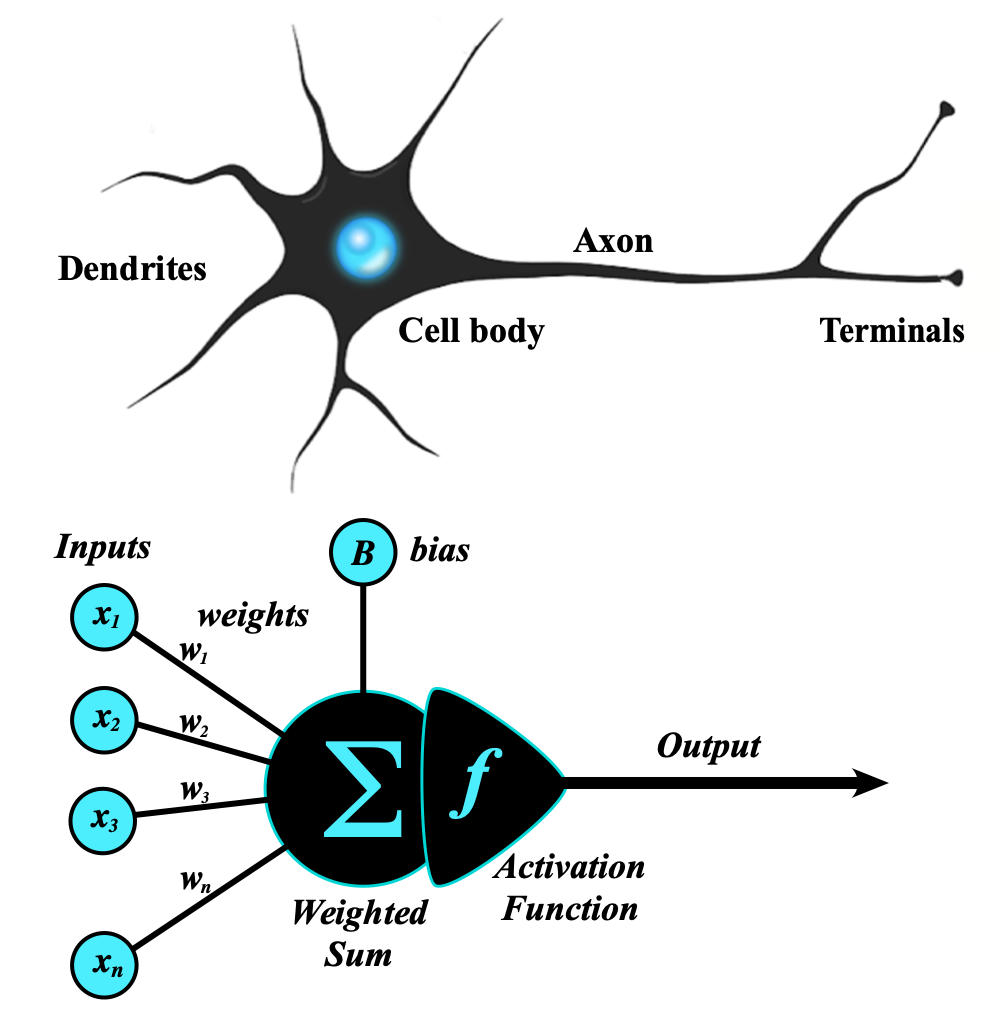

### **Neuron Architecture:**


For each node (neuron of the NN) we take a weighted sum of our information. So each piece of information is multiplied by a weight and then we take the sum of it together. Then the activation function determines how strong of a signal the node will send out.




###**Activation Functions**

They are functions that add non-linearity to the NN. Allow Neural Networks to accomplish complex tasks





## **High Level Architecture**


<div>
<img src="https://miro.medium.com/v2/resize:fit:1400/0*fny6vMZG5rJWCmAM" width="500"/>
</div>



There are three types of layers

## Input Layer

Input Layer takes in your Raw Data. The number of nodes determine the dimension of the layer. We often denote raw data with $$x_i$$

### Matrix Form:

$$X = \begin{align}
\begin{bmatrix}
x_1\\
x_2\\
x_3\\
\vdots\\
x_n
\end{bmatrix}
\end{align}
$$



## Output Layer

Output layer is your what the neural network will output. It depends on the task, and we often mark the output with $$\hat{y}$$

The output could be a binary classification in which case one node output is fine. It might be a multi-classification problem in which case you might want 10 node outputs.

### Matrix Form:


$$Y = \begin{align}
\begin{bmatrix}
y_1\\
\end{bmatrix}
\end{align}
$$




$$Y = \begin{align}
\begin{bmatrix}
y_1\\
y_2\\
y_3\\
\vdots\\
y_{10}
\end{bmatrix}
\end{align}
$$



## Hidden Layer

The Hidden Layers are all layers besides the input layer and Output Layer. This is where most computation is done. We denote the layer we are at with $$z_i^l = \sigma(h^l_i)$$

### Matrix Form:


$$Z_l = \begin{align}
\begin{bmatrix}
z^l_1\\
z^l_2\\
z^l_3\\
\vdots\\
z^l_m
\end{bmatrix}
 = σ(H_l) = \sigma(\begin{bmatrix}
h^l_1\\
h^l_2\\
h^l_3\\
\vdots\\
h^l_m
\end{bmatrix})
\end{align}
$$



Where z are the nodes themselves and l is the layer you are at.

## Nodes:

Since we are working with a fully connected neural networks, each node in the hidden layer will take in every node in the previous layer. The current node will be a weighted sum of the nodes in the previous layer.



**An example is provided below:**

<div>
<img src="
https://drive.google.com/uc?id=1aWeqSX45ZN79g125QmbS8aPm1TpfqWm6" width="500"/>
</div>


## Edges:

Each edge represents a distinct weight.

## Weights Notation

If you look at the image above, the weights notation is:

$$w_{ji}$$

where j is the node number in the current layer and i is the node number in the previous layer

## Bias Notation

The bias notation is:

$$b^l_j$$



where j is the current node number and l is the layer number

# Concrete Example: Calculation of 2 Nodes to 1 Node

<div>
<img src="
https://drive.google.com/uc?id=1aWeqSX45ZN79g125QmbS8aPm1TpfqWm6" width="500"/>
</div>


Given this example I will show you how to extract a matrix multiplication and dimensions of each layer.

### Fact 1:

Since we have two nodes in the input layer, the dimension of the input layer is $$X = \begin{align}
\begin{bmatrix}
x_1\\
x_2\\
\end{bmatrix}
\end{align} \in \mathbb{R}^2
$$



### Fact 2:

Since there is one node in the Hidden Layer 1, we have the dimension
$$Z_l = \begin{align}
\begin{bmatrix}
z^l_1\\
\end{bmatrix}
\end{align} \in \mathbb{R}
$$



### Fact 3:

Definition of $Z_l$ and $H_l$
$$Z_l = \text{Activation Function}(H_l)$$
$$H_l \in \mathbb{R}$$
$$H_l = [h_1]$$

### Fact 4:

Weighted Sum Definition:

$$h^1_1 = w_{11}x_1+w_{12}x_2+b^1_1$$

### Refactoring to X we get:

$$[h^1_1]=[w_{11}, w_{12}]\begin{align}
\begin{bmatrix}
x_1\\
x_2\\
\end{bmatrix}
\end{align} + [b^1_1]
$$

$$W_1=[w_{11}, w_{12}] \in \mathbb{R}^{1\times2}$$
$$B_1=[b^1_1] \in \mathbb{R}$$

That is the most detailed way to determine the dimensions of the weight matrix and bias matrix.

The other way is to try to piece the dimensions together given that the equation from layer to layer is:

$$H_1 = W_1X+B_1$$
$$H_2 = W_2H_1+B_2$$
$$H_3 = W_3H_2+B_3$$
$$\vdots$$
$$H_n = W_{n}H_{n-1}B_n$$

Imagine that $$H_n \in \mathbb{R}^m$$ and $$H_{n-1} \in \mathbb{R}^n$$

Then $$B_n \in \mathbb{R}^m$$

And $$W_n \in \mathbb{R}^{m \times n}$$

# Concrete Example 2 Hidden Layers, 1 Input Layer, 1 Output Layer

So let's say we have our binary classification of our potential well again. There were two features. The position of the particle and the velocity of the particle. We have labels 0 for when it is stuck in the potential well. We have 1 for when it is freely moving around. There are 10,000 training examples, but we wil be doing it batches of 32.







I will explain the logic behind the creation of NN.

You will add a hidden layer after hidden layer 2, and adjust the math for Hidden Layer 2 to Hidden Layer 3 and Hidden Layer 3 to Output

## Objective

Build neural network with (first hidden layer: 2 Neurons) and (second hidden layer: 3 Neurons.) The output should predict whether or not the object escaped the potential well. The input data has two features: position and velocity

## Step 1: Draw Nodes

<div>
<img src="https://drive.google.com/uc?id=1v2U8qX5OBT3MuEfFI9pHCDRMuvqIbT0U" width="1000"/>
</div>


Number of Nodes determine the dimension. Since we want to vectorize, we will also consider the dimension of number of training examples.



## Step 2: Write down Dimension of Each Layer


### What is Input Layer Dimension?:

Since there are two nodes, we know:

$$X \in \mathbb{R}^2$$

Since we are vectorizing, we want the dimension to be on the right.

$$X \in \mathbb{R}^{2\times 10,000}$$

### What is Hidden Layer 1 Dimension?:

Since there are two nodes, we know:

$$H_1 \in \mathbb{R}^2$$

Since we are vectorizing, we know:

$$H_1 \in \mathbb{R}^{2\times 10,000}$$

### How to connect Input -> Hidden Layer 1?: What is Weight 1 Dimension and Bias 1 Dimension?

$$H_1 = W_1X+B_1$$



Since $X \in \mathbb{R}^{2\times 10,000}$ and $H_1 \in \mathbb{R}^{2\times 10,000}$, $W_1 \in \mathbb{R}^{2 \times 2}$ and $B_1 \in \mathbb{R}^2$

With the activation function we have:
$$Z_1 = \sigma(H_1)$$

### What is Hidden Layer 2 Dimension?:

Since there are three nodes in HL2, $$H_2 \in \mathbb{R}^{3 \times 10,000}$$



### How to connect Hidden Layer 1 -> Hidden Layer 2?: What is Weight 2 Dimension and Bias 2 Dimension

$$H_2 = W_2Z_1+B_2$$


Since $H_1 \in \mathbb{R}^{2\times 10,000}$ and $H_2 \in \mathbb{R}^{3\times 10,000}$, $W_2 \in \mathbb{R}^{3 \times 2}$ and $B_2 \in \mathbb{R}^3$

With the activation function we have:
$$Z_2 = \sigma(H_2)$$

### What is Output Layer Dimension?:

Since there are one node in the output layer, $$Y \in \mathbb{R}^{1 \times 10,000}$$

### How to Connect Hidden Layer 2 -> Output Layer? What is Weight 3 Dimension and Bias 3 DImension?

$$Y = W_3Z_2+B_3$$

Since $H_2 \in \mathbb{R}^{3\times 10,000}$ and $Y \in \mathbb{R}^{1\times 10,000}$, $W_3 \in \mathbb{R}^{1 \times 3}$ and $B_3 \in \mathbb{R}$

#Activation Function Math:

## Sigmoid

<div>
<img src="https://miro.medium.com/v2/resize:fit:1033/0*D5do3xhv5ulF50w2.png" width="500"/>
</div>


$$\sigma = \frac{1}{1+e^{-z}}$$

Sigmoid derivative is defined as:
$$\sigma*(1-\sigma)$$

## Relu:

ReLU Function Mathematics:

<div>
<img src="https://media.geeksforgeeks.org/wp-content/uploads/20250129162127770664/Relu-activation-function.png" width="500"/>
</div>








Relu is defined as $$\max(0,x)$$

## TanH


<div>
<img src="https://www.baeldung.com/wp-content/uploads/sites/4/2022/02/tanh.png" width="500"/>
</div>

Tanh is defined as:

$$\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$$

TanH derivative:

$$1-(\tanh(x))^2$$

### Activation Function Advantages



Typically, people pick ReLU for faster computation, there are other reasons but one of them is its easy to compute.

Tanh function has the advantage of being smooth and bounded similar to Sigmoid function.

If you ever face this issue, you can look at this article to learn more. For now just choose between ReLU, Tanh, and Sigmoid function.

https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/


**IMPORTANT**

Picking the right activation functions depends case to case. This is a hyperparameter.



In [ ]:
#Brief Warmup Implement relu,
# sigmoid, sigmoid derivative, tanh, tanh derivative.

def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
  #Return Sigmoid Derivative Function:

def tanh(z):
  #Return TanH Function

def tanh_derivative(z):
    return 1-tanh(z)**2

# Code

## Objective

Code the mathematics we wrote above. You will write the code for matrix multiplications between layers. Instead of 2 hidden layers, it is 3 hidden layers.

## **Important**



## The main thing is that the dimensions match up. You might have different dimensions like $R^{10,000 \times 2}$. In which case, the matrix multiplication must shift. Or you can reshape the input. Just make sure when you are connecting dimensions are aligned.

## Step 0: Check the Dimensions of Input Data and Output Data

In [ ]:
#Extract the position and velocity data.
position = df['Position'].to_numpy()
velocity = df['Velocity'].to_numpy()

#Extract the Label Data
labels = df['Label'].to_numpy()
#Convert everything to numpy.

#Stack the position and velocity data to make a feature dataset

features = np.hstack((position.reshape((1000,1)), velocity.reshape((1000,1))))
labels = labels.reshape((1000,1))

#Make sure the dimensions of the input and output are aligned.
features.shape, labels.shape

#Split data set into train and test.
#Also add the argument random_state = 42, if you don't you'll get different answers


## Step 1: Forward Pass

I have already written the binary cross entropy loss function. You have to implement the code for forward propagation.


In [ ]:
def bce_loss(pred, y):
    eps = 1e-15  # avoid log(0)
    pred = np.clip(pred, eps, 1 - eps)
    return -np.mean(y * np.log(pred) + (1 - y) * np.log(1 - pred))


I want you to implement a 3 hidden layer code.
The @ sign does matrix multiplication as a hint.

The dimension aligning will occur when you initialize the weights and biases



In [ ]:
def forward_pass(x, W1, b1, W2, b2, W3, b3):
    """
    Perform a forward pass through a 3-layer neural network.

    Parameters:
    - x (ndarray): Input data of shape (n_samples, input_dim)
    - W1 (ndarray): Weights from input layer to first hidden layer
    - b1 (ndarray): Biases for first hidden layer
    - W2 (ndarray): Weights from first hidden layer to second hidden layer
    - b2 (ndarray): Biases for second hidden layer
    - W3 (ndarray): Weights from second hidden layer to output layer
    - b3 (ndarray): Biases for output layer

    Returns:
    - out (ndarray): Output of the network (after sigmoid activation)
    - cache (tuple): Tuple of intermediate variables used for backpropagation
    """

    # Step 1: Compute first hidden layer pre-activation
    h1 =
    # Step 2: Apply ReLU activation to first hidden layer
    z1 =

    # Step 3: Compute second hidden layer pre-activation
    h2 =
    # Step 4: Apply ReLU activation to second hidden layer
    z2 =

    # Step 5: Compute output layer pre-activation
    h3 = z2 @ W3 + b3
    # Step 6: Apply binary classification activation function for output.
    #Check LogisticRegression Module if you forgot.
    out = sigmoid(h3)

    # Step 7: Store intermediate values for use in backpropagation
    cache = (x, z1, h1, z2, h2, h3, out)

    # Step 8: Return the final output and the cache
    return out, cache


So we have two features for input layer.

I want HL1 to have 4 nodes

I want HL2 to have 3 nodes

Output will just be one node.



In [ ]:
#Set Weight Matrices. I would use np.ones() to create your matrices.
# https://numpy.org/devdocs/reference/generated/numpy.ones.html Documentation
W1 = np.ones((2, 4))
W2 = np.ones((4, 3))
W3 = np.ones((3,1))

#Set biases:
#I would use np.ones.
b1 = np.ones((1,4))
b2 = np.ones((1,3))
b3 = np.ones((1,1))

#
pred, cache = forward_pass(x_train, W1, b1, W2, b2, W3, b3)
loss = bce_loss(pred, y_train)

#We will comeback to this when we do backpropagation


In [ ]:
#Print loss here:


np.float64(6.471090374553947)

Loss should be 6.47. If this isn't it check that you picked random_state = 42 for train_test_split assuming code implemented is correct.

## PyTorch Implementation:

### Example Code

In [ ]:
class Sample(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(2, 2)
            nn.ReLU()
            nn.Linear(2,1)
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.network(x)

The above builds:

<div>
<img src="https://drive.google.com/uc?id=1wQzsxpZmVyGw73nA-QaO7twMhWuuMtc1" width="500"/>
</div>


        self.network = nn.Sequential(
            nn.Linear(2, 2)
            nn.ReLU()
            nn.Linear(2,1)
            nn.Sigmoid()
        )

nn.Sequential funciton builds your network for you. It connects the layers and the activation function together.


### Linear(2,2), nn.ReLU() built:

<div>
<img src="https://drive.google.com/uc?id=1tNerpNzCwJB1Ge_jd13OflX8qfOwsvGa" width="500"/>
</div>

Input -> Hidden Layer 1, with activation function ReLU


### Linear(2,1), nn.Sigmoid() built:

<div>
<img src="https://drive.google.com/uc?id=1jQWA-VYBQIkydTwWyxLigAA-j1GXv1BG" width="500"/>
</div>


Hidden Layer 1 -> Output, with activation function Sigmoid

### What did this build? Draw just Neurons and write down dimension of each layer. Write down Activation function as well. Write down dimension of weights and biases as well

    class Sample(nn.Module):
        def __init__(self):
            super().__init__()
            self.network = nn.Sequential(
                nn.Linear(2, 3)
                nn.ReLU()
                nn.Linear(3, 5)
                nn.Tanh()
                nn.Linear(5,3)
                nn.Sigmoid()
            )


        def forward(self, x):
            return self.network(x)

Answer:

### Exercise:

Build an input layer with the two features of position and velocity.

Hidden Layer 1 of 16 neurons. Activation function Tanh()

Hidden Layer 2 of 32 neurons. Activation Tanh()

Hidden Layer 3 of 16 neurons. Activation Tanh()

Output layer of 1. Classification

In [ ]:
import torch
import torch.nn as nn

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):

    def forward(self, features):

model = NeuralNetwork()

# Homework:

Write down in detailed version of a two node input and a three node hidden layer. This would be labeling each edge, node, and bias, and showing the matrices with the elements in the matrices.

Write down the dimensions of a 3 hidden layer, 1st hidden layer has 4 neurons, 2nd has 8 neurons, and last one has 10 neurons. Input is 1, and Output is 2.

Write down dimensions of each layer and the weights and biases matrix that connects each layer to one another.